m x n for x is: (414, 6)
m x n for y is: (414,)
final cost value (train): 42.58817011929101
final cost value (test): 26.501039756869766
0.5473177951408604


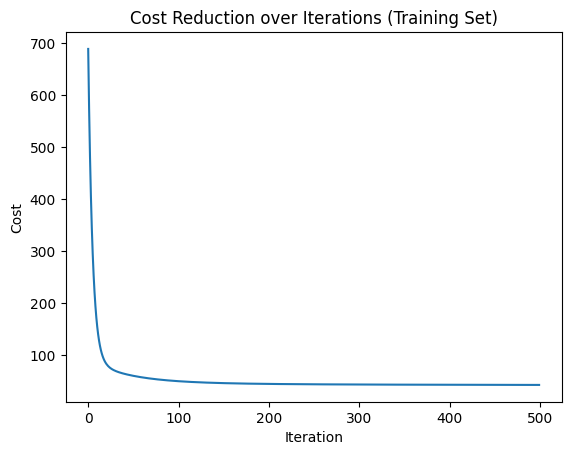

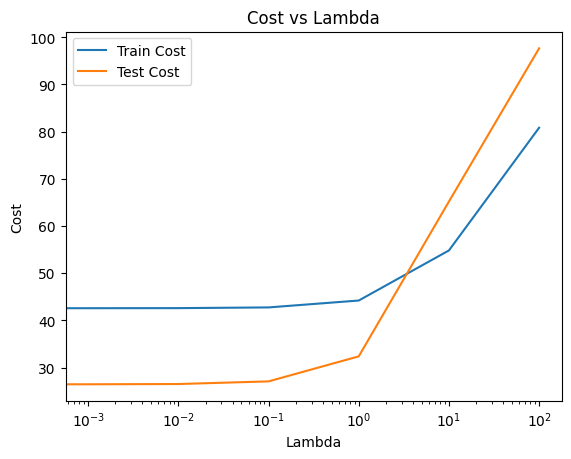

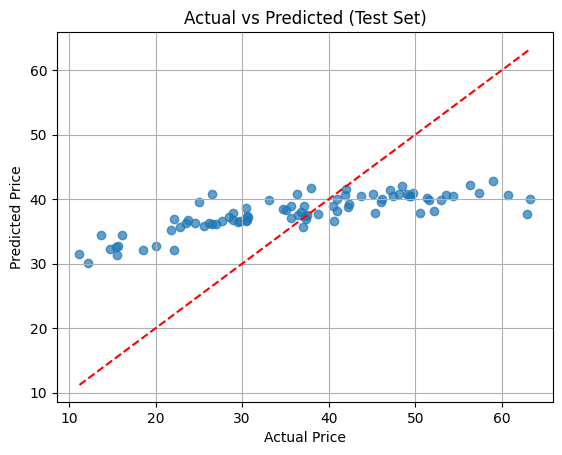

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv(r'C:\Users\tyt36\OneDrive\Desktop\ML\week2\Real estate.csv', low_memory=False)

x = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = np.array(df['Y house price of unit area'])

x = (x - x.mean()) / (x.max() - x.min())
x = x.to_numpy()

print(f"m x n for x is: {x.shape}")
print(f"m x n for y is: {y.shape}")

[x_train, x_test, y_train, y_test] = train_test_split(x,y, test_size=0.2, random_state=42)

m, n = x.shape
m_train = x_train.shape[0]
alpha = 0.1
lambda_ = 0.01
iterations = 500
w = np.zeros(n)
b = 0

cost_history = []
w_history = []
b_history = []

def predict(x, w, b):
    return np.dot(x, w) + b

def cost_fn(y_true, y_pred, m, w, lambda_):
    error = (y_pred - y_true)
    mse = (1 / (2 * m)) * np.sum(error ** 2)
    reg = (lambda_/(2*m)*np.sum(w ** 2))
    return mse + reg

def gradient_descent(x, w, b, y, m, lambda_):
    y_pred = predict(x, w, b)
    error = y_pred - y
    dw = (1 / m) * np.dot(x.T, error) + (lambda_/m)*w
    db = (1 / m) * np.sum(error)
    return dw, db

for i in range(iterations):
    dw, db = gradient_descent(x_train, w, b, y_train, m_train, lambda_)
    w = w - alpha * dw
    b = b - alpha * db

    y_pred = predict(x_train, w, b)
    cost = cost_fn(y_train, y_pred, m_train, w, lambda_)
    cost_history.append(cost)
    w_history.append(w)
    b_history.append(b)

print(f"final cost value (train): {cost}")
# print(f"final w value is: {w}")
# print(f"final b value is: {b}")

y_test_pred = predict(x_test, w, b)
test_cost = cost_fn(y_test, y_test_pred, len(y_test), w, lambda_)
print(f"final cost value (test): {test_cost}")
rmse = r2_score(y_train, y_pred)
print(rmse)

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations (Training Set)')
plt.show()

lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100]
train_costs = []
test_costs = []

for lambda_ in lambdas:
    w = np.zeros(n)
    b = 0
    for _ in range(iterations):
        dw, db = gradient_descent(x_train, w, b, y_train, m_train, lambda_)
        w -= alpha * dw
        b -= alpha * db
    train_cost = cost_fn(y_train, predict(x_train, w, b), m_train, w, lambda_)
    test_cost = cost_fn(y_test, predict(x_test, w, b), len(y_test), w, lambda_)
    train_costs.append(train_cost)
    test_costs.append(test_cost)

plt.plot(lambdas, train_costs, label='Train Cost')
plt.plot(lambdas, test_costs, label='Test Cost')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost vs Lambda')
plt.show()

y_test_pred = predict(x_test, w, b)

plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)
plt.show()


